In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def perturb_and_plot_roots(base_poly, num_samples=100, stdev=1, hist2dbins=512):
    perturb = np.random.normal(
        size=(num_samples, base_poly.shape[0], 2),
        scale=stdev
    ).view(np.complex128)[:, :, 0]
    perturb[:, 0] = 0
    
    polys = base_poly + perturb
    
    roots = np.zeros((num_samples, base_poly.shape[0] - 1), dtype=np.complex128)
    for i in range(num_samples):
        roots[i] = np.roots(polys[i])
        
    plt.figure(figsize=(18,4))
    plt.subplot(1, 3, 1)
    root_radii = np.absolute(roots.flatten())
    plt.hist(
        root_radii,
        bins=256,
        range=(np.percentile(root_radii, 1) - 0.1, np.percentile(root_radii, 99) + 0.1),
        density=True,
    )
    plt.xlabel("radius")
    plt.title(f"deg={base_poly.shape[0] - 1}")

    plt.subplot(1, 3, 2)
    plt.hist(
        np.angle(roots.flatten()),
        bins=64,
        density=True,
    )
    plt.xlabel("angle")
    plt.title(f"deg={base_poly.shape[0] - 1}")

    plt.subplot(1, 3, 3)
    plt.hist2d(
        x=roots.flatten().real,
        y=roots.flatten().imag,
        bins=hist2dbins,
    )
    plt.axis('square')
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.title(f"deg={base_poly.shape[0] - 1}")

## Perturbing z^n
Each of the lower degree coefficients is a standard complex normal distribution with unit variance.

We plot $n = 3, 10, 100$ below.
We see that $n$ increases the distribution of the radius of the roots gets tighter around 1.

CPU times: user 3.05 s, sys: 29.2 ms, total: 3.08 s
Wall time: 3.09 s


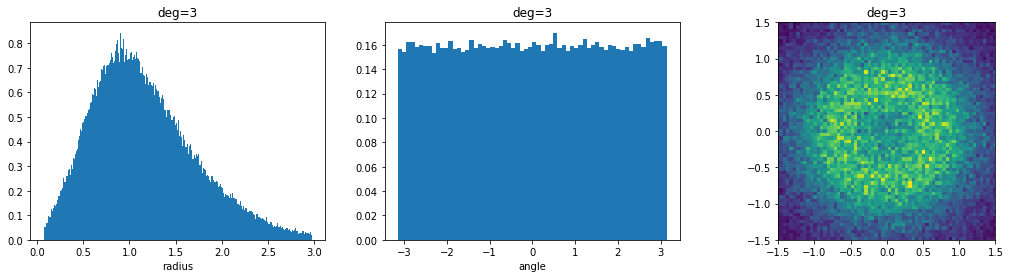

In [3]:
%%time
perturb_and_plot_roots(
    base_poly=np.array([1] + 3 * [0], dtype=np.complex128),
    num_samples=40000,
    hist2dbins=180,
)

CPU times: user 874 ms, sys: 17.2 ms, total: 891 ms
Wall time: 892 ms


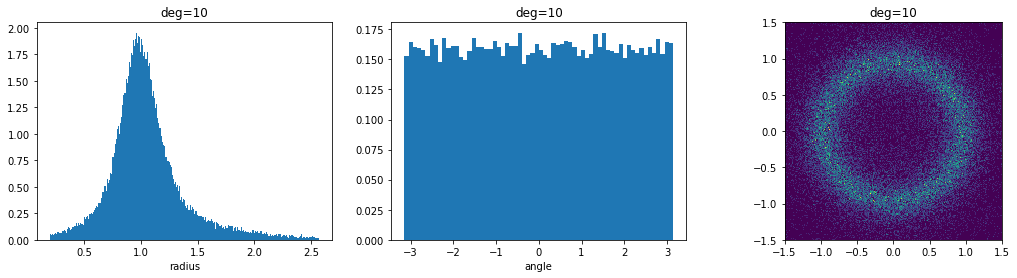

In [4]:
%%time
perturb_and_plot_roots(
    base_poly=np.array([1] + 10 * [0], dtype=np.complex128),
    num_samples=5000
)

CPU times: user 20.6 s, sys: 218 ms, total: 20.8 s
Wall time: 5.32 s


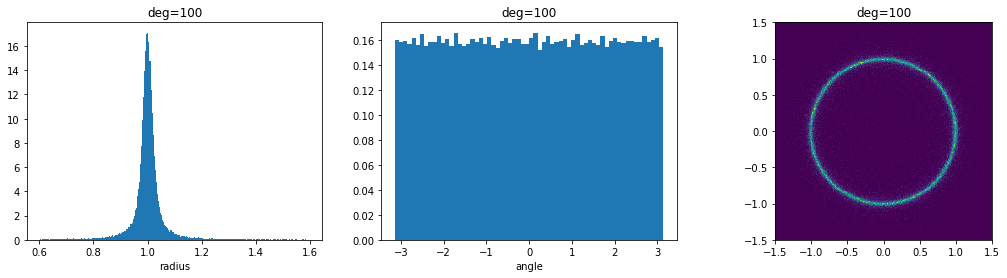

In [5]:
%%time
perturb_and_plot_roots(
    base_poly=np.array([1] + 100 * [0], dtype=np.complex128),
    num_samples=500
)

## Perturbing polynomial with roots distributed as complex normal
Again, increasing degree means radii concentrate around 1.

In [6]:
def poly_from_roots(roots):
    ret = np.array([1], dtype=np.complex128)
    for root in roots:
        ret = np.polymul(ret, np.array([1, -root], dtype=np.complex128))
    
    return ret

np.random.seed(42)
roots = np.random.normal(size=(10, 2), scale=1).view(np.complex128)[:, 0]
poly = poly_from_roots(roots)
computed_roots = np.roots(poly)
print(np.abs(np.sort(roots.real) - np.sort(computed_roots.real)).max())
print(np.abs(np.sort(roots.imag) - np.sort(computed_roots.imag)).max())

5.329070518200751e-15
3.6637359812630166e-15


CPU times: user 2.91 s, sys: 32.1 ms, total: 2.94 s
Wall time: 2.94 s


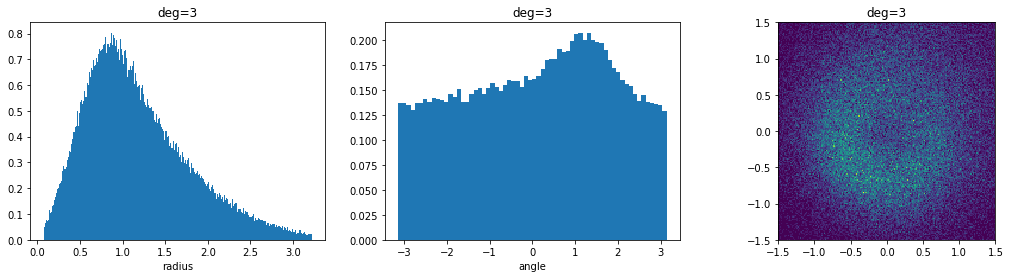

In [7]:
%%time
np.random.seed(42)
perturb_and_plot_roots(
    base_poly=poly_from_roots(
        np.random.normal(size=(3, 2), scale=0.5).view(np.complex128)[:, 0]
    ),
    num_samples=40000,
    hist2dbins=512,
)

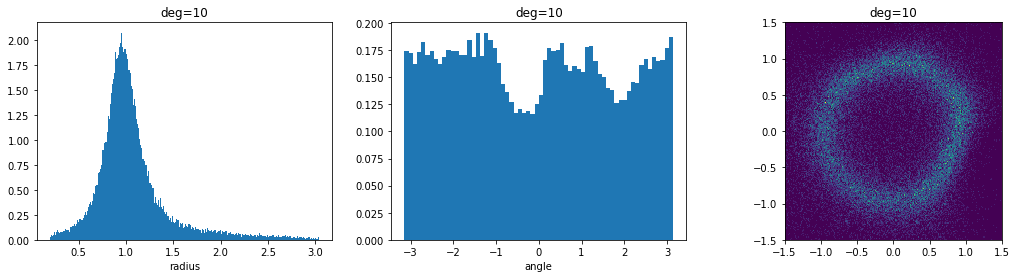

In [8]:
np.random.seed(42)
perturb_and_plot_roots(
    base_poly=poly_from_roots(
        np.random.normal(size=(10, 2), scale=0.5).view(np.complex128)[:, 0]
    ),
    num_samples=5000,
    hist2dbins=512,
)

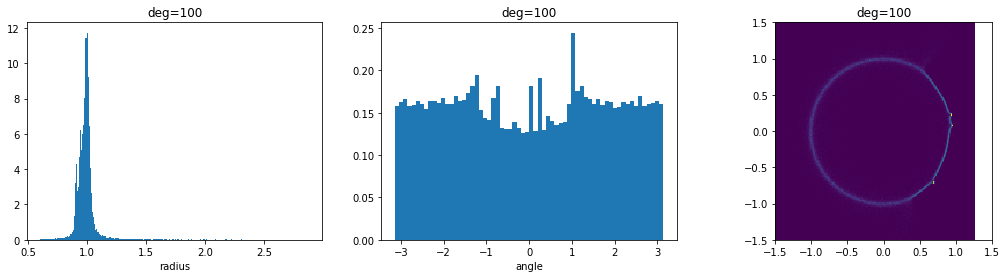

In [9]:
np.random.seed(42)
perturb_and_plot_roots(
    base_poly=poly_from_roots(
        np.random.normal(size=(100, 2), scale=0.5).view(np.complex128)[:, 0]
    ),
    num_samples=500,
    hist2dbins=512,
)